All data provided by the challenge- and the opencern-dataset was \cite{higgsPaper}

The features Weight and Label were originally only provided in the training-dataset. The data used in this thesis is expanded by complete Weight-, Labels-features and the Kaggle-specific features KaggleSet and KaggleWeight.

All features of the dataset are described in Appendix A.

reducing features by using their relationship with PRI_jet_num

In [1]:
import kaggleData as kD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
(header,
 test_data,
 test_weights,
 test_labels,
 train_data,
 train_weights,
 train_labels) = kD.getWholeDataSet(kSet="v")

In [3]:
def countErrorsByJets(header,data):
    index_PRI_jet_num = np.int(header.index("PRI_jet_num"))
    ######### 0 1 2 3 #########
    totals = np.zeros((4),dtype=np.int)
    errors = np.zeros((4,len(header)),dtype=np.int)
    for i in range(0,len(data[:,index_PRI_jet_num])):
        jets = np.int(data[i,index_PRI_jet_num])
        totals[jets] += 1
        for feat in header:
            index_feat = np.int(header.index(feat))
            if data[i,index_feat] == -999:
                errors[jets,index_feat] +=1
    return totals,errors

In [4]:
def plot_PJN_Errors(header,data):
    totals,errors = countErrorsByJets(header,data)
    %pylab inline

    font = {'weight' : 'bold',
            'size'   : 10}


    fig = plt.figure(figsize=(15,10))
    
    b = 0
    colors = ['green','red','blue','grey']
    plot = [0,0,0,0]
    for i in [0,1,2,3]:
        plot[i] = plt.bar(left = np.arange(31), height = errors[i,:],
               bottom = b, color=colors[i], alpha=0.5)
        b += errors[i,:]
        
    #yticks = np.linspace(0,totals.cumsum()[-1])
    plt.yticks(np.unique(b))
    #plt.xticks(np.arange(31))
    
    plt.ylabel('Error-Values')
    plt.xlabel('Features')
    plt.title('Error-Values in features related to PRI_jet_num (Pjn)')

    plt.xticks(np.arange(31), header, rotation=-90)
    matplotlib.rc('font', **font)
    plt.legend((plot[0][0],plot[1][0],plot[2][0],plot[3][0]), ('Pjn = 0', 'Pjn = 1','Pjn = 2','Pjn = 3',))
    plt.show

Populating the interactive namespace from numpy and matplotlib


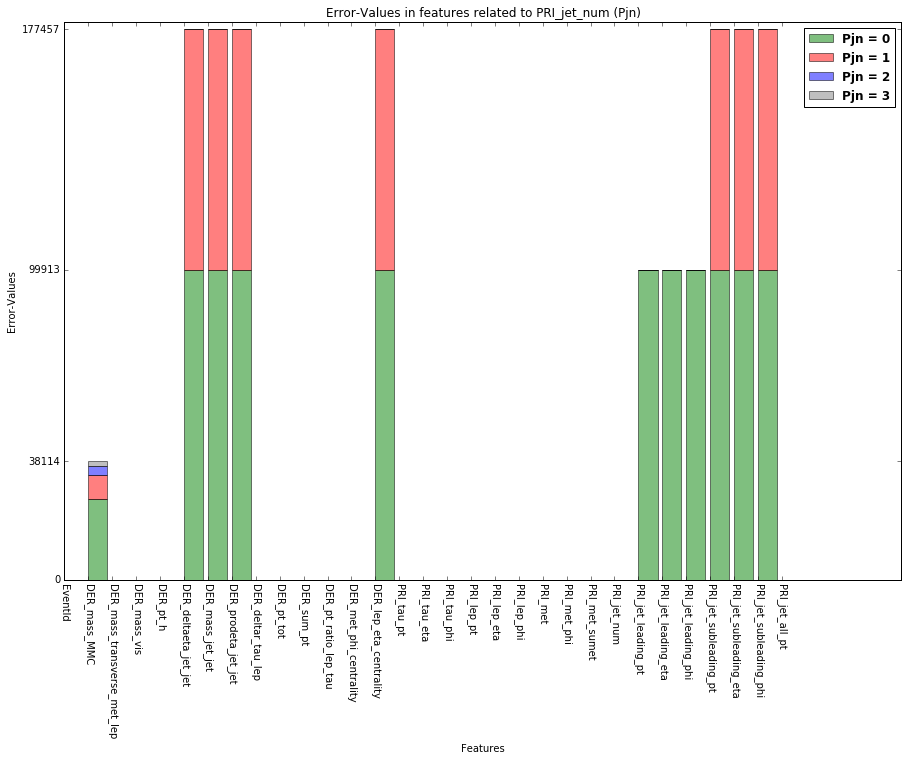

In [5]:
plot_PJN_Errors(header,train_data)

Populating the interactive namespace from numpy and matplotlib


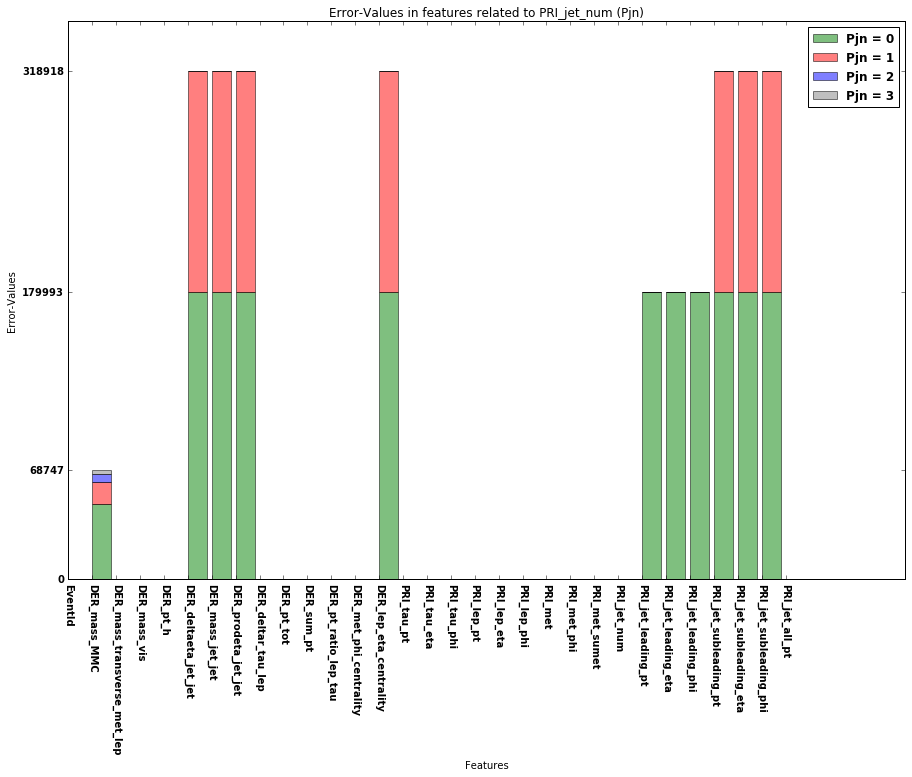

In [6]:
plot_PJN_Errors(header,test_data)

We extract all featurenames which contain errors

In [7]:
totals,errors = countErrorsByJets(header,test_data)
errorFeatures = []
for i in range(0,31):
    if errors[0,i] != 0:
        errorFeatures.append(header[i])        

We still want DER_mass_MMC, it is a valuable feature, as other tests had shown

In [8]:
errorFeatures.remove('DER_mass_MMC')

In [9]:
errorFeatures

['DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

In [10]:
def scaleAxis(data,cutPercent):
    sData = sorted(data)
    l = len(sData)
    cutPoint = int(cutPercent*l/100)
    axisMax = sData[l - cutPoint]
    axisMin = sData[cutPoint]
    if axisMin == -999.0:
        for x in sData:
            if x > axisMin:
                axisMin = x
                break
    return axisMin,axisMax

In [11]:
def generateLabelsColors(labels):
    colors = []
    for i in range(0,len(labels)):
        label = labels[i]
        if label == 1:
            labelColor = "b" ##signal = blue
        elif label == 0:
            labelColor = "r" ##background = red
        else:
            print("ERROR in Labels!")
        colors.append(labelColor)
    return colors

In [12]:
def scatter(xName,yName,xData,yData,labels):
    %pylab inline
    mainFig = plt.figure(figsize=(15,10))
    ax = mainFig.add_subplot(111)

    colors = generateLabelsColors(labels)

    scale = 0.5
    xmin,xmax = scaleAxis(xData,scale)
    ymin,ymax = scaleAxis(yData,scale)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)

    ax.scatter(xData, yData, s=1, edgecolor="", c=colors, alpha=0.2)
    
    plt.xlabel(xName)
    plt.ylabel(yName)
    title = ("Scatterplot: "+ xName+ " to "+ yName)
    
    blue_patch = mpatches.Patch(color='blue', label='signal')
    red_patch = mpatches.Patch(color='red', label='background')
    ax.legend(handles=[blue_patch,red_patch])
    
    plt.title(title)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


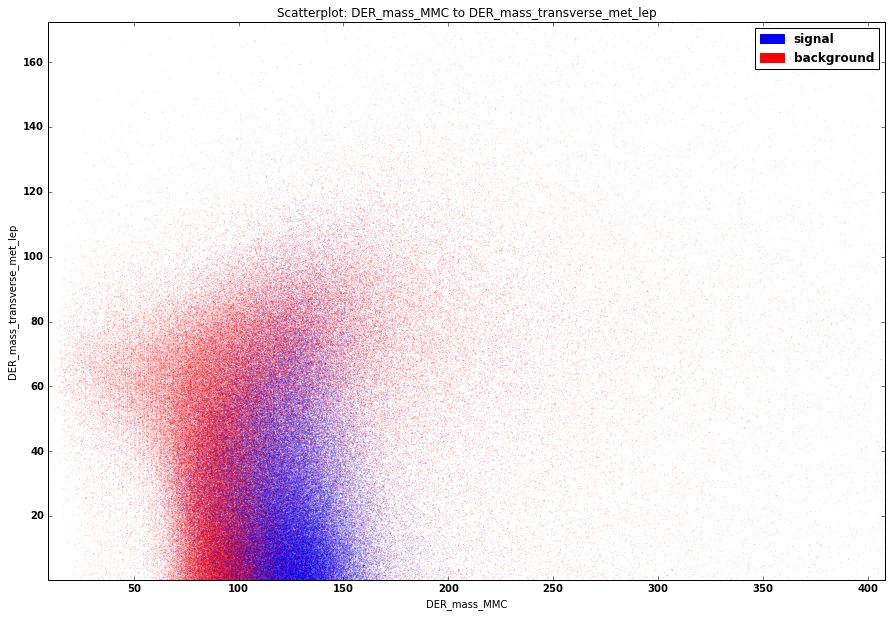

In [13]:
xName = header[1]
yName = header[2]
scatter(xName,yName,test_data[:,1],test_data[:,2],test_labels)

In [18]:
def hist(featName,data,labels):
    font = {'weight' : 'bold',
            'size'   : 10}

    b = 100

    title = str("Histogram: "+ featName)
    sdata = []
    bdata = []
    for i in range(0,len(data)):
        if labels[i] == 0:
            bdata.append(data[i])
        else:
            sdata.append(data[i])


    mainFig = plt.figure(figsize=(15,10))
    ax = mainFig.add_subplot(111)

    colors = generateLabelsColors(labels)
    
    scale = 0.5
    xmin,xmax = scaleAxis(data,scale)
    
    xmin = int(xmin)
    xmax = int(xmax)

    shist = ax.hist(sdata,bins = np.linspace(xmin,xmax,b), normed=1, facecolor='red', alpha=0.3)
    bhist = ax.hist(bdata,bins = np.linspace(xmin,xmax,b), normed=1, facecolor='blue', alpha=0.3)

    ax.legend(('Signal', 'Background'))

    plt.ylabel('Percentage in data')
    plt.xlabel('Values')
    plt.title(title)

    return mainFig

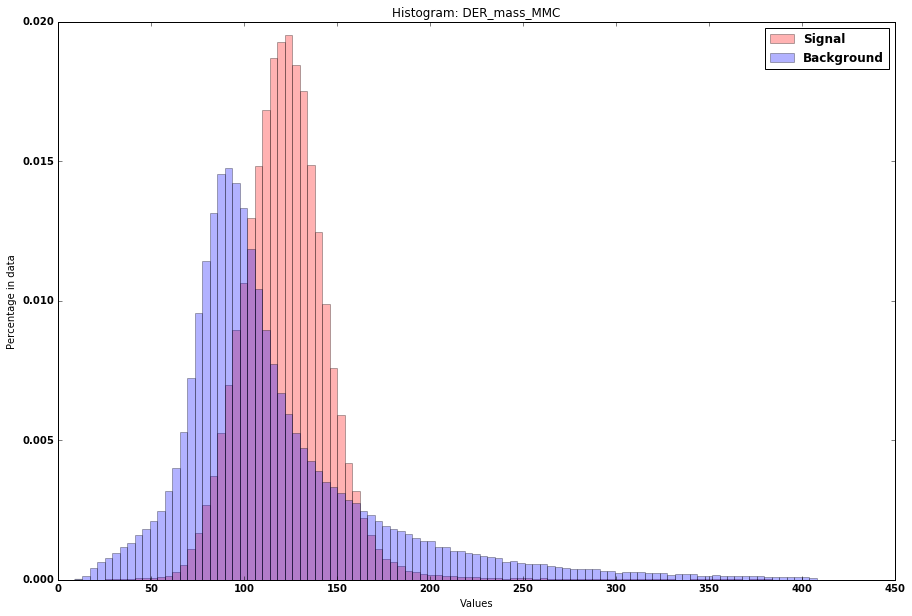

In [19]:
featName = header[1]
data = test_data[:,1]
fig = hist(featName,data,test_labels);